
## Observations and Insights 
There is only one mouse with duplicate data, so most of the data is fine. That mouse is not in any of the four treatments we focused on.

There is about an equal amount of males and females which speaks to the randomness.

There were no outliers in when looking at all the data, but when looking within the individual treatments, there were in Infubinol.

Capomulin and Ramicane seem to be the most effective.

Heavier mice seem to have larger tumors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_drug_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_drug_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combined_drug_data["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [3]:
# Checking the number of mice.
len(combined_drug_data["Mouse ID"].unique())

249

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
newdf = combined_drug_data[combined_drug_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print (newdf)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drug_data = combined_drug_data.loc[combined_drug_data["Mouse ID"] != 'g989']

drug_data = drug_data.rename(columns={"Tumor Volume (mm3)":"Vol"})
                 
drug_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Vol,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(drug_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
groupby1 = drug_data.groupby(drug_data["Drug Regimen"])
means = groupby1["Vol"].mean()
means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Vol, dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby1 = drug_data.groupby(drug_data["Drug Regimen"])
means = groupby1["Vol"].mean()
medians = groupby1["Vol"].median()
variances = groupby1["Vol"].var()
stdevs = groupby1["Vol"].std()
sems = groupby1["Vol"].sem()

sum_stats = pd.merge(means, medians, on="Drug Regimen")
sum_stats = sum_stats.rename(columns={"Vol_x": "Mean", "Vol_y": "Meadian"})
sum_stats = pd.merge(sum_stats, variances, on="Drug Regimen")
sum_stats = sum_stats.rename(columns={"Vol": "Variance"})
sum_stats = pd.merge(sum_stats, stdevs, on="Drug Regimen")
sum_stats = sum_stats.rename(columns={"Vol": "Std Dev"})
sum_stats = pd.merge(sum_stats, sems, on="Drug Regimen")
sum_stats = sum_stats.rename(columns={"Vol": "SEM"})
sum_stats


,Mean,Meadian,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_single = drug_data.groupby('Drug Regimen').agg({'Vol': ['mean', 'median', 'var', 'std', 'sem']})
grouped_single

Vol                                          
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

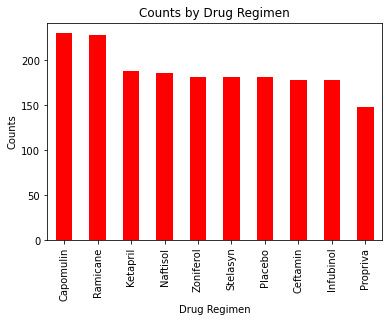

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

d_data = drug_data["Drug Regimen"].value_counts()

d_data.plot(kind="bar", facecolor="red", title="Counts by Drug Regimen")

plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.show()


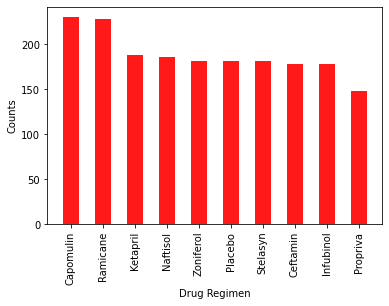

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.\
#used this as ref https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

n_data = pd.DataFrame({'count' : drug_data.groupby( [ "Drug Regimen"] ).size()}).reset_index()
n_data = n_data.sort_values(by=['count'], ascending=False)
x_axis = n_data["Drug Regimen"]
y_axis = n_data["count"]
plt.bar(x_axis,y_axis, color='r', width=.5, alpha=0.9, align="center")
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.show()


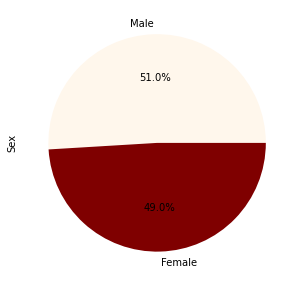

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["purple", "orange"]
nd_data = drug_data["Sex"].value_counts()
nd_data.plot(kind="pie", figsize=(15,5), cmap="OrRd", autopct="%1.1f%%")

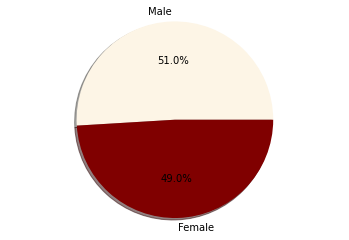

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
nd_data = drug_data["Sex"].value_counts()
Males = nd_data["Male"]
Females = nd_data["Female"]
Sexes = ["Male", "Female"]
Sexcount = [Males, Females]
# Tell matplotlib to create a pie chart based upon the above data
explode = (0,0)
colors = ["oldlace","maroon" ]
plt.pie(Sexcount, explode=explode, labels=Sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../SexBreakdown.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_Max = drug_data.groupby('Mouse ID')
Maxes = grouped_Max['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Max_Vol = pd.merge(Maxes, drug_data, on=['Mouse ID', 'Timepoint'], how='left')
Max_Vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Vol,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treats = Max_Vol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
T_Vol =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

Vols = Max_Vol["Vol"]
quartiles = Vols.quantile([.25,.5,.75])
lowerq = quartiles[.25]
median = quartiles[.5]
upperq = quartiles[.75]
iqr = upperq-lowerq

Upper_Bound = upperq + 1.5*iqr
Lower_Bound = lowerq - 1.5*iqr

print("The min is " + str(Vols.min())+ "." + " The Max is " + str(Vols.max()) +
      "The IQR is " + str(iqr)+ "The Median is " + str(median) +
      "Upper Bound: " + str(Upper_Bound) + "Lower Bound: " +str(Lower_Bound))
print(f"Values below {Lower_Bound} could be outliers.")
print(f"Values above {Upper_Bound} could be outliers. There are no outliers in the data overall.")

 # Locate the rows which contain mice on each drug and get the tumor volumes
# for treatments in treats

    



Infu_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Infubinol")]
Ceft_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Ceftamin")]


    # Determine outliers using upper and lower bounds
    

The min is 22.05012627. The Max is 78.56701362The IQR is 19.17775725750002The Median is 55.793278175Upper Bound: 93.82025999125004Lower Bound: 17.109230961249963
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers. There are no outliers in the data overall.


In [16]:


Treatm =["Capomulin" ,"Ramicane" ,"Infubinol", "Ceftamin"]
data6 =[]
for treat in Treatm:

    Rami_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == treat)]
    R_Vols = Rami_data["Vol"]
    data6.append(R_Vols)
    R_quartiles = R_Vols.quantile([.25,.5,.75])
    R_lowerq = R_quartiles[.25]
    R_median = R_quartiles[.5]
    R_upperq = R_quartiles[.75]
    R_iqr = R_upperq-R_lowerq

    R_Upper_Bound = R_upperq + 1.5*R_iqr
    R_Lower_Bound = R_lowerq - 1.5*R_iqr

    print("bounds: "+ str(R_Lower_Bound) + ", " + str(R_Upper_Bound))
    print("min: " + str(R_Vols.min())+" max: "+str(R_Vols.max()))

    

bounds: 20.70456164999999, 51.83201549
min: 23.34359787 max: 47.68596303
bounds: 17.912664470000003, 54.30681135
min: 22.05012627 max: 45.22086888
bounds: 36.83290494999999, 82.74144559000001
min: 36.321345799999996 max: 72.2267309
bounds: 25.355449580000002, 87.66645829999999
min: 45.0 max: 68.92318457


In [17]:
# I did this is in the for loop but had already done this. Kept it to show you how hard I worked.

# add subset Capomulin, Ramicane, Infubinol, and Ceftamin
Rami_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Ramicane")]
R_Vols = Rami_data["Vol"]
R_quartiles = R_Vols.quantile([.25,.5,.75])
R_lowerq = R_quartiles[.25]
R_median = R_quartiles[.5]
R_upperq = R_quartiles[.75]
R_iqr = R_upperq-R_lowerq

R_Upper_Bound = R_upperq + 1.5*R_iqr
R_Lower_Bound = R_lowerq - 1.5*R_iqr

print("For Ramicane: bounds: "+ str(R_Lower_Bound) + ", " + str(R_Upper_Bound))
print("min: " + str(R_Vols.min())+" max: "+str(R_Vols.max()))


# add subset Capomulin, Ramicane, Infubinol, and Ceftamin
Capo_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Capomulin")]
C_Vols = Capo_data["Vol"]
C_quartiles = C_Vols.quantile([.25,.5,.75])
C_lowerq = C_quartiles[.25]
C_median = C_quartiles[.5]
C_upperq = C_quartiles[.75]
C_iqr = C_upperq-C_lowerq

C_Upper_Bound = C_upperq + 1.5*C_iqr
C_Lower_Bound = C_lowerq - 1.5*C_iqr

print(" For Capomulun: bounds: "+ str(C_Lower_Bound) + ", " + str(C_Upper_Bound))
print("min: " + str(C_Vols.min())+" max: "+str(C_Vols.max()))


# add subset Capomulin, Ramicane, Infubinol, and Ceftamin
Infu_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Infubinol")]
I_Vols = Infu_data["Vol"]
I_quartiles = I_Vols.quantile([.25,.5,.75])
I_lowerq = I_quartiles[.25]
I_median = I_quartiles[.5]
I_upperq = I_quartiles[.75]
I_iqr = I_upperq-I_lowerq

I_Upper_Bound = I_upperq + 1.5*I_iqr
I_Lower_Bound = I_lowerq - 1.5*I_iqr

print("For Infubinol: bounds: "+ str(I_Lower_Bound) + ", " + str(I_Upper_Bound))
print("min: " + str(I_Vols.min())+" max: "+str(I_Vols.max()))



# add subset Capomulin, Ramicane, Infubinol, and Ceftamin
Ceft_data = Max_Vol.loc[(Max_Vol["Drug Regimen"] == "Ceftamin")]
cf_Vols = Ceft_data["Vol"]
cf_quartiles = cf_Vols.quantile([.25,.5,.75])
cf_lowerq = cf_quartiles[.25]
cf_median = cf_quartiles[.5]
cf_upperq = cf_quartiles[.75]
cf_iqr = cf_upperq-cf_lowerq

cf_Upper_Bound = cf_upperq + 1.5*cf_iqr
cf_Lower_Bound = cf_lowerq - 1.5*cf_iqr

print("For Ceftamin: bounds: "+ str(cf_Lower_Bound) + ", " + str(cf_Upper_Bound))
print("min: " + str(cf_Vols.min())+" max: "+str(cf_Vols.max()))




For Ramicane: bounds: 17.912664470000003, 54.30681135
min: 22.05012627 max: 45.22086888
 For Capomulun: bounds: 20.70456164999999, 51.83201549
min: 23.34359787 max: 47.68596303
For Infubinol: bounds: 36.83290494999999, 82.74144559000001
min: 36.321345799999996 max: 72.2267309
For Ceftamin: bounds: 25.355449580000002, 87.66645829999999
min: 45.0 max: 68.92318457


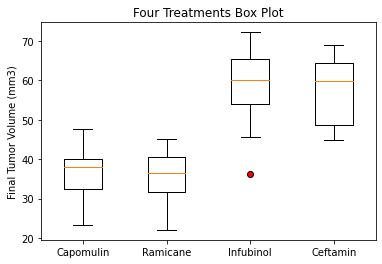

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin
red_square = dict(markerfacecolor='r', marker='o')
#data = [C_Vols, R_Vols, I_Vols, cf_Vols]
fig7, ax7 = plt.subplots()
ax7.set_title('Four Treatments Box Plot')
ax7.boxplot(data6, flierprops=red_square)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax7.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

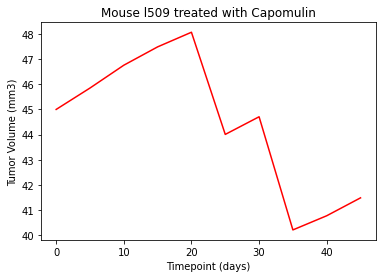

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Mouse I509
I5_data = drug_data.loc[(drug_data["Mouse ID"] == "l509")]
I5_data
l509_vol, = plt.plot(I5_data["Timepoint"], I5_data['Vol'], color="red", label="l509")
plt.title("Mouse l509 treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

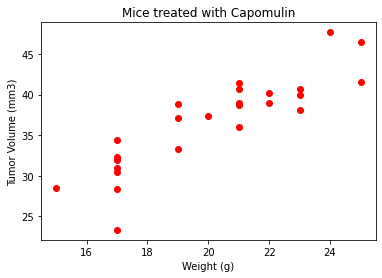

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.plot(Capo_data['Weight (g)'], Capo_data['Vol'], marker="o", color="red", linewidth=0)
plt.title("Mice treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

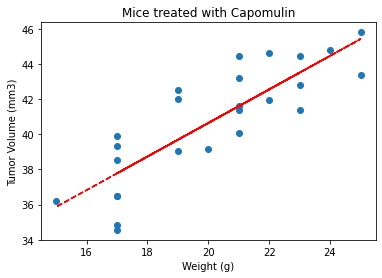

The correlation coefficient between Weight and Tumor Volume is 0.84


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_data = drug_data.loc[(drug_data["Drug Regimen"] == "Capomulin")]

Cap = Capomulin_data.groupby("Mouse ID").mean()


x_values = Cap['Weight (g)']
y_values = Cap['Vol']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"--",color='r')
plt.title("Mice treated with Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"The correlation coefficient between Weight and Tumor Volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
